In [ ]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score, jaccard_score


In [ ]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2024-01-07 03:32:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0.04s   

2024-01-07 03:32:56 (477 KB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [ ]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<Axes: xlabel='Clump', ylabel='UnifSize'>

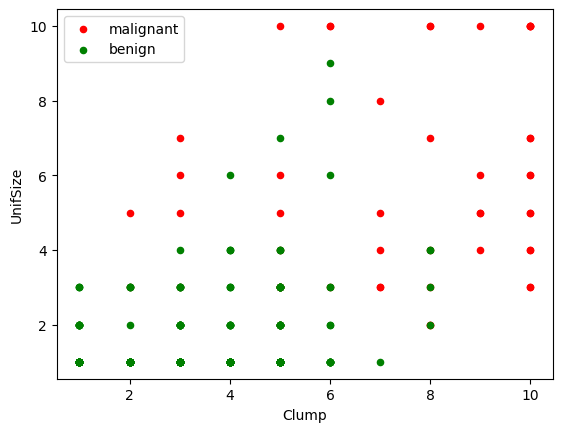

In [ ]:
ax = cell_df[cell_df['Class']== 4][0:50].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', label = 'malignant', color = 'red')
cell_df[cell_df['Class']== 2].plot(kind='scatter', x = 'Clump', y='UnifSize', color = 'green', label = 'benign', ax = ax)

In [ ]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
#change the BareNuc to int from object type and drop the row that are not numerical values
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
feature_df =  cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asanyarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
target_df = cell_df['Class']
y = np.asanyarray(target_df)
y[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=41)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

In [ ]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train,y_train)

SVC()

In [ ]:
y_hat = clf.predict(x_test)
f1_score(y_test, y_hat, average='weighted')

0.9496902666977141

In [ ]:
jaccard_score(y_test, y_hat, pos_label=2)

0.9278350515463918

## With linear model kernel

In [ ]:
clf_linear = svm.SVC(kernel = 'linear')
clf_linear.fit(x_train,y_train)
y_hat = clf_linear.predict(x_test)
f1_score(y_test, y_hat, average = 'weighted')

0.9423426286762715

In [ ]:
jaccard_score(y_test, y_hat, pos_label = 2)

0.9183673469387755